In [2]:
%matplotlib inline

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor, LogisticRegression
from sklearn.svm import LinearSVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, f1_score

# How good is my diamond?

## Abstract

A diamond prices and qualities dataset is been analyzed, explored, cleaned and visualized. Some machine learning work has been done. A try for training of sci-kit learn algorithms - Linear Regression, Ridge, Lasso, Elastic Net, RANSAC is included. 
Most of the work is just playing around because the first trained algorithm - Linear Regression - appears to be the most suitable. Tip: Go straight to the last cell.

## Introduction

Hello and welcome! Let's play with some diamonds!

Main goal of the present work is an exploration of a large dataset about diamond qualities and price per piece.   

Is price related to diamond size and color or pricing is only matter of a witted advertisement? 
Is a man ready to pay whatever price for a precious rock or only women do that? :)

![Diamond are girl's best friends](pigs/Gentlemen_Prefer_Blondes_Movie_Trailer_Screenshot.jpg "Gentlemen Prefer Blondes (1953) Movie Song")

Every body knows that *diamond are girl's best friends*, that Marilyn Monroe sings in 1953. But does anybody know what makes a diamond highly esteemed?

There are some features which define a diamond:

### Main Diamond Features
1. Color
2. Clarity
3. Cut
4. Table
5. Depth
6. Carat

![diamond measurements](pigs/Bbf0GWk.jpg "diamond anathomy")

1. Color: 
Describes how transparent a diamond is  with Uppercase letters, starting form D. D is for best colorless transparency, and Z stays for possessing light coloring.
![colors](pigs/gia-diamond-color-scale.jpg "colors")
2. Clarity
Refers to the absence of the Inclusions and Blemishes. Starting from FL = flawless going to I3= level 3 inclusions

**GIA diamond clarity grading scale**

| Category | Flawless | Internally Flawless|| Very Very Slightly Included|| Very Slightly Included|| Slightly Included||  Included|||
|---|:---:|:---:|
|Grade|FL|IF|VVS1|VVS2|VS1|VS2|SI1|SI2|I1|I2|I3|

3. Cut: Describe cut quality of the diamond.
4. Table: The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
5. Depth (Total Depth): The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Carat: Carat weight of the Diamond.


### EDA
Let's read and explore diamond dataset. See if we can make it more clear for understanding.

In [4]:
diamond_data = pd.read_csv("data/diamonds.csv")
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond_data.shape

(53940, 11)

In [6]:
diamond_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [7]:
diamond_data.rename(columns = {'x':'length', 'y':'width', 'z':'height'}, inplace= True)

In [8]:
diamond_data.describe()

,carat,depth,table,price,length,width,height
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In dataset, there are items with zero dimensions. (Length, width or height equals zero). If they are not many we can just remove them.

In [9]:
diamond_data.loc[(diamond_data['length']==0) | (diamond_data['width']==0) | (diamond_data['height']==0)]

,carat,cut,color,clarity,depth,table,price,length,width,height
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
len(diamond_data.loc[(diamond_data['length']==0) | (diamond_data['width']==0) | (diamond_data['height']==0)])

20

In [11]:
diamond_data = diamond_data[(diamond_data[['length','width','height']] != 0).all(axis=1)]

In [12]:
diamond_data.loc[(diamond_data['length']==0) | (diamond_data['width']==0) | (diamond_data['height']==0)]

,carat,cut,color,clarity,depth,table,price,length,width,height


In [13]:
diamond_data.corr()

,carat,depth,table,price,length,width,height
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
length,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
width,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
height,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


Columns length,	width, and height are highly correlated, i.e. they are too much connected. Good idea is to reduce them into one column.

In [14]:
diamond_data['volume'] = pd.Series(diamond_data.height * diamond_data.width * diamond_data.length)

In [15]:
diamond_data.drop(["length","width","height"], axis = 1, inplace = True)

In [16]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [17]:
diamond_data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
volume     float64
dtype: object

Obviously, we need to perform a transformation of non-numeric values in numerics in order to implement a machine learning algorithms.

In [18]:
diamond_data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

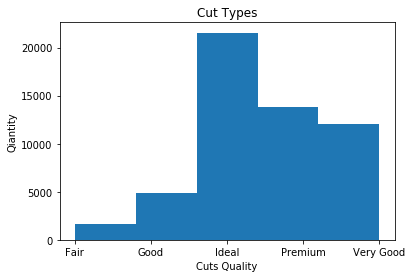

In [19]:
_, ax = plt.subplots()
plt.hist(diamond_data['cut'], bins=5, label="str")
plt.title('Cut Types')
ax.set_xlabel('Cuts Quality')
ax.set_ylabel('Qiantity')
plt.show()

In [20]:
cut_types = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
diamond_data.cut = diamond_data.cut.replace(cut_types)

In [21]:
diamond_data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

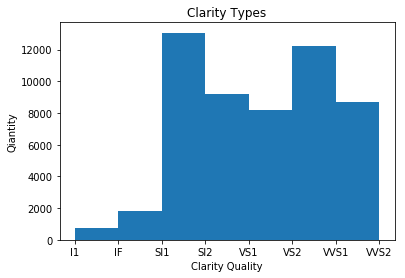

In [22]:
_, ax = plt.subplots()
plt.hist(diamond_data['clarity'], bins=7)
plt.title('Clarity Types')
ax.set_xlabel('Clarity Quality')
ax.set_ylabel('Qiantity')
plt.show()

In [23]:
clarity_types = {'IF':7, 'VVS1':6, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3, 'SI2':2, 'I1':1}
diamond_data.clarity = diamond_data.clarity.replace(clarity_types)

In [24]:
diamond_data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

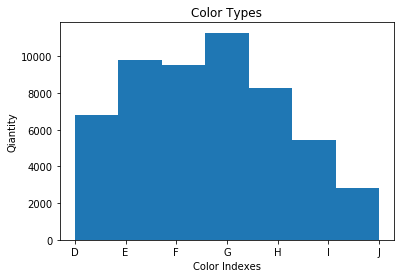

In [25]:
_, ax = plt.subplots()
plt.hist(diamond_data['color'], bins=7)
plt.title('Color Types')
ax.set_xlabel('Color Indexes')
ax.set_ylabel('Qiantity')
plt.show()

In [26]:
color_types = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
diamond_data.color = diamond_data.color.replace(color_types)

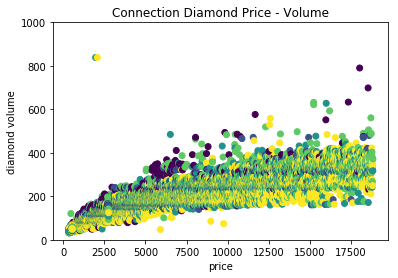

In [27]:
plt.scatter(diamond_data.price, diamond_data.volume, c = diamond_data.cut)
plt.ylim(0, 1000)
plt.title("Connection Diamond Price - Volume")
plt.xlabel("price")
plt.ylabel("diamond volume")

plt.show()

In [28]:
diamond_data.describe()

,carat,cut,color,clarity,depth,table,price,volume
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,3.904228,4.405972,3.950538,61.749514,57.456834,3930.993231,129.897567
std,0.473795,1.116579,1.701272,1.463422,1.432331,2.234064,3987.280446,78.219789
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,31.707984
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,949.000000,65.189759
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,114.840180
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5323.250000,170.846415
max,5.010000,5.000000,7.000000,7.000000,79.000000,95.000000,18823.000000,3840.598060


### Preparing data set

In [29]:
diamond_attributes = diamond_data.drop('price', axis = 1)
diamond_labels = diamond_data.price

In [30]:
diamond_attributes_normalized = scale(diamond_attributes)
diamond_attributes = pd.DataFrame(diamond_attributes_normalized, columns = diamond_attributes.columns)

In [31]:
diamond_attributes.head()

,carat,cut,color,clarity,depth,table,volume
0,-1.198204,0.981374,0.936971,-1.332874,-0.174203,-1.099725,-1.172291
1,-1.240417,0.085773,0.936971,-0.649537,-1.361090,1.585988,-1.219546
2,-1.198204,-1.705429,0.936971,0.717136,-3.385781,3.376463,-1.173891
3,-1.071566,0.085773,-1.414232,0.033799,0.454149,0.243131,-1.063334
4,-1.029353,-1.705429,-2.002033,-1.332874,1.082501,0.243131,-0.996948


## Split to train and test segments

In [32]:
results = {} # for collection performance scores of each model

In [33]:
diamond_attributes_train, diamond_attributes_test, diamond_labels_train, diamond_labels_test = train_test_split(diamond_attributes, diamond_labels, train_size = 0.7, test_size = 0.3)


In [34]:
k_fold = KFold(n_splits = 10)

Because of the fact we want to predict some discrete values (diamond prices) we shall stick to linear models for machine learning. We won't do any classification.

Following implementation of the most widely used models for regression:

## Linear Regression

In [35]:
model_LR = LinearRegression()
scores_LR_train = cross_val_score(model_LR, diamond_attributes_train, diamond_labels_train, cv = k_fold)

In [36]:
model_LR.fit(diamond_attributes_train, diamond_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
train_score_LR = r2_score(diamond_labels_train, model_LR.predict(diamond_attributes_train))

In [38]:
results["Linear Regression"] ={"Train Score": max(scores_LR_train)}

In [39]:
max(scores_LR_train)

0.9095967932405326

In [40]:
results["Linear Regression"]["Best Train Score"] = max(scores_LR_train)

In [41]:
scores_LR_test = r2_score(diamond_labels_test, model_LR.predict(diamond_attributes_test))

In [42]:
scores_LR_test

0.8981585264532254

In [43]:
results["Linear Regression"]["Test Score"] = scores_LR_test

In [93]:
best_LR_predict = model_LR.predict(diamond_attributes_train)

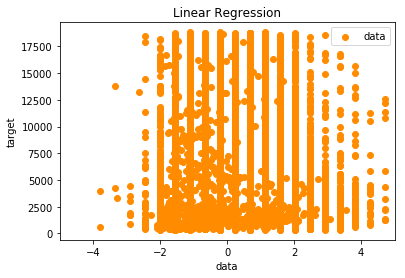

In [98]:
# lw = 2
plt.scatter(diamond_attributes_train.table, diamond_labels_train, color='darkorange', label='data')
# plt.plot(diamond_attributes_train.table, best_LR_predict, color='navy', lw=lw, label='Linear Regression')
plt.xlabel('data')
plt.xlim(-5, 5)
plt.ylabel('target')
plt.title('Linear Regression')
plt.legend()
plt.show()

## RANSAC

In [44]:
scores_RANSAC = cross_val_score(RANSACRegressor(), diamond_attributes_train, diamond_labels_train, cv = k_fold)

In [45]:
scores_RANSAC

array([0.83558312, 0.84589366, 0.85408604, 0.79195779, 0.87754736,
       0.82012868, 0.89852682, 0.80046008, 0.81489833, 0.84386793])

In [46]:
results["RANSAC"] ={"Best Train Score": max(scores_RANSAC)}

In [47]:
model_RANSAC = RANSACRegressor()
model_RANSAC.fit(diamond_attributes_train, diamond_labels_train)
train_score_RANSAC = r2_score(diamond_labels_train, model_RANSAC.predict(diamond_attributes_train))

In [48]:
results["RANSAC"]["Train Score"] = train_score_RANSAC

In [49]:
scores_RANSAC_test = r2_score(diamond_labels_test, model_RANSAC.predict(diamond_attributes_test))
results["RANSAC"]["Test Score"]= scores_RANSAC_test

### Elastic NET

In [50]:
scores_ElasticNet = cross_val_score(ElasticNet(), diamond_attributes_train, diamond_labels_train, cv = k_fold)

In [51]:
scores_ElasticNet

array([0.84080599, 0.84415907, 0.83622166, 0.83565574, 0.84701698,
       0.84480336, 0.84825091, 0.84049282, 0.85444736, 0.84123844])

In [52]:
results["Elastic Net"] ={"Best Train Score": max(scores_ElasticNet)}

In [53]:
tuned_params = [{"alpha": [0.01, 0.1, 1, 10, 100, 1000], "l1_ratio": [0.01, 0.5, 1, 10]}]
grid_EN = GridSearchCV(ElasticNet(), tuned_params, cv = k_fold)
grid_EN.fit(diamond_attributes_train, diamond_labels_train)
print(grid_EN.best_params_) 

C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

{'alpha': 0.01, 'l1_ratio': 0.01}


In [54]:
model_EN = grid_EN.estimator
model_EN.fit(diamond_attributes_train, diamond_labels_train)
train_score_EN = r2_score(diamond_labels_train, model_EN.predict(diamond_attributes_train))

In [55]:
results["Elastic Net"]["Train Score"] = train_score_EN

In [56]:
scores_EN_test = r2_score(diamond_labels_test, model_EN.predict(diamond_attributes_test))
results["Elastic Net"]["Test Score"] = scores_EN_test 

## LASSO

In [57]:
scores_LASSO = cross_val_score(Lasso(), diamond_attributes_train, diamond_labels_train, cv = k_fold)

C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [58]:
results["LASSO"] ={"Best Train Score": max(scores_LASSO)}

In [59]:
tuned_params = [{"alpha": [0.01, 0.1, 1, 10, 100, 1000]}]
grid_LASSO = GridSearchCV(Lasso(), tuned_params, cv = k_fold)
grid_LASSO.fit(diamond_attributes_train, diamond_labels_train)
print(grid_LASSO.best_params_) 

C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

{'alpha': 0.01}


C:\Users\Obache\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [60]:
model_LASSO = grid_LASSO.estimator
model_LASSO.fit(diamond_attributes_train, diamond_labels_train)
train_score_LASSO = r2_score(diamond_labels_train, model_LASSO.predict(diamond_attributes_train))

In [61]:
results["LASSO"]["Train Score"] =  train_score_LASSO

In [62]:
scores_LASSO_test = r2_score(diamond_labels_test, model_LASSO.predict(diamond_attributes_test))
results["LASSO"]["Test Score"] = scores_LASSO_test 

## Ridge 

In [63]:
scores_ridge = cross_val_score(Ridge(), diamond_attributes_train, diamond_labels_train, cv = k_fold)

In [64]:
results["Ridge"] ={"Best Train Score": max(scores_ridge)}

In [65]:
tuned_params = [{"alpha": [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
grid_ridge = GridSearchCV(Ridge(), tuned_params, cv = k_fold)
grid_ridge.fit(diamond_attributes_train, diamond_labels_train)
print(grid_ridge.best_params_) 

{'alpha': 100}


In [66]:
model_ridge = grid_ridge.estimator
model_ridge.fit(diamond_attributes_train, diamond_labels_train)
train_score_ridge = r2_score(diamond_labels_train, model_ridge.predict(diamond_attributes_train))

In [67]:
results["Ridge"]["Train Score"] = train_score_ridge

In [68]:
scores_ridge_test = r2_score(diamond_labels_test, model_ridge.predict(diamond_attributes_test))
results["Ridge"]["Test Score"] = scores_ridge_test

## Linear Support Vector Regression (LinearSVR)

In [71]:
scores_LinSVR = cross_val_score(LinearSVR(), diamond_attributes_train, diamond_labels_train, cv = k_fold)

In [73]:
results["Support Vector Regression"] ={"Best Train Score": max(scores_LinSVR)}

In [76]:
tuned_params = [{"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
grid_LinSVR = GridSearchCV(LinearSVR(), tuned_params, cv = k_fold)
grid_LinSVR.fit(diamond_attributes_train, diamond_labels_train)
print(grid_LinSVR.best_params_) 

{'C': 1000}


In [88]:
model_LinSVR = grid_LinSVR.estimator
model_LinSVR.fit(diamond_attributes_train, diamond_labels_train)
train_score_LinSVR = r2_score(diamond_labels_train, model_LinSVR.predict(diamond_attributes_train))

In [89]:
best_predict = model_LinSVR.predict(diamond_attributes_train)

In [79]:
results["Support Vector Regression"]["Train Score"] = train_score_LinSVR

In [80]:
scores_LinSVR_test = r2_score(diamond_labels_test, model_LinSVR.predict(diamond_attributes_test))
results["Support Vector Regression"]["Test Score"] = scores_LinSVR_test

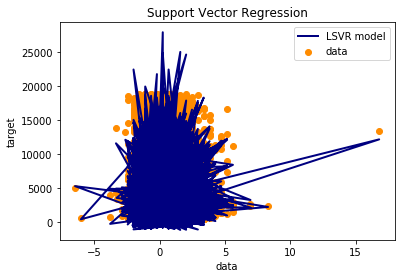

In [90]:
lw = 2
plt.scatter(diamond_attributes_train.table, diamond_labels_train, color='darkorange', label='data')
plt.plot(diamond_attributes_train.table, best_predict, color='navy', lw=lw, label='LSVR model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Conclusion

In [81]:
results

{'Elastic Net': {'Best Train Score': 0.8544473633364347,
  'Test Score': 0.827964738180516,
  'Train Score': 0.843294071557943},
 'LASSO': {'Best Train Score': 0.9096253255114335,
  'Test Score': 0.898583961306917,
  'Train Score': 0.9061359569376042},
 'Linear Regression': {'Best Train Score': 0.9095967932405326,
  'Test Score': 0.8981585264532254,
  'Train Score': 0.9095967932405326},
 'RANSAC': {'Best Train Score': 0.8985268215819519,
  'Test Score': 0.7848541998554378,
  'Train Score': 0.8458164443205971},
 'Ridge': {'Best Train Score': 0.9095962203904173,
  'Test Score': 0.8979284064831009,
  'Train Score': 0.9061365655879172},
 'Support Vector Regression': {'Best Train Score': 0.8728147521435458,
  'Test Score': 0.8451683936797861,
  'Train Score': 0.8652096301351264}}

In [82]:
sorted(results, key = lambda x: (results[x]['Test Score']))[::-1]

['LASSO',
 'Linear Regression',
 'Ridge',
 'Support Vector Regression',
 'Elastic Net',
 'RANSAC']

In [83]:
print("LASSO Testing Score :", results['LASSO']['Test Score'])

LASSO Testing Score : 0.898583961306917


In [84]:
print("Linear Regression Testing Score", results['Linear Regression']['Test Score'])

Linear Regression Testing Score 0.8981585264532254


It is clear that LASSO has better testing performance than Linear Regression. May be we should choose this for predicting diamond prices. But according to Occam's razor it is the best to play simple and we choose to work with not such complex but quite well performed algorithm as Linear Regression.